In [1]:
import rasterio
import numpy as np
from copy import deepcopy
from rasterio.plot import show
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch

# Load Environment

In [2]:
SAMPLE_SIZE = 10

In [3]:
file_path = "../../data/forest/fuel_type/FBP_fueltypes_Canada_30m_EPSG3978_20240522.tif"

In [4]:
color_label = [
    [-9999, (255, 255, 255, 255), ""],
    [1, (209, 255, 115, 255), "C-1 Spruce-Lichen Woodland"],
    [2, (34, 102, 51, 255), "C-2 Boreal Spruce"],
    [3, (131, 199, 149, 255), "C-3 Mature Jack or Lodgepole Pine"],
    [4, (112, 168, 0, 255), "C-4 Immature Jack or Lodgepole Pine"],
    [5, (223, 184, 230, 255), "C-5 Red and White Pine"],
    [7, (112, 12, 242, 255), "C-7 Ponderosa Pine / Douglas Fir"],
    [11, (196, 189, 151, 255), "D-1 Leafless Aspen"],
    [13, (196, 189, 151, 255), "D-1/D-2 Aspen"],
    [31, (255, 255, 190, 255), "O-1a Matted Grass"],
    [101, (130, 130, 130, 255), "Non-fuel"],
    [102, (115, 223, 255, 255), "Water"],
    [105, (204, 204, 204, 255), "Vegetated Non-Fuel"],
    [415, (255, 211, 127, 255), "M-1 Boreal Mixedwood - Leafless (15% Conifer)"],
    [625, (255, 211, 127, 255), "M-1/M-2 Boreal Mixedwood (25% Conifer)"],
    [650, (255, 211, 127, 255), "M-1/M-2 Boreal Mixedwood (50% Conifer)"],
    [675, (255, 211, 127, 255), "M-1/M-2 Boreal Mixedwood (75% Conifer)"],
]

# Convert RGBA values (0-255) to Matplotlib format (0-1)
color_dict = {entry[0]: np.array(entry[1]) / 255 for entry in color_label}
label_dict = {entry[0]: entry[2] for entry in color_label}

# Create colormap & normalizer
unique_values = list(color_dict.keys())
colors = [color_dict[val] for val in unique_values]
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(unique_values + [max(unique_values) + 1], cmap.N)

In [5]:
id_merge_dict = {
    416 : [
        415,
        625,
        650,
        675
    ],
    12: [
        11,
        13
    ]
}

label_merge_dict = {
    416: 'M-1 Boreal Mixedwood',
    12: 'D-1/D-2 Aspen'
}

color_merge_dict = {
    416: color_dict[415],
    12: color_dict[11]
}

In [29]:
# Create colored box handles
def plot_legend(
    color_dict:dict = color_dict,
    label_dict:dict = label_dict,
    id_merge_dict:dict = id_merge_dict,
    label_merge_dict:dict = label_merge_dict,
    color_merge_dict:dict = color_merge_dict,
    legend_anchor:tuple = (.5, -0.25),
    title:str = "Fuel Type",
    title_font_size:int = 25,
    font_size = 20,
    legend_num_col = 3
):
    new_color_dict = deepcopy(color_dict)
    new_label_dict = deepcopy(label_dict)
    
    for id in id_merge_dict:
        # add the mereged lable color
        new_color_dict[id] = color_merge_dict[id]
        new_label_dict[id] = label_merge_dict[id]
        # delete merged labels 
        for merged_id in id_merge_dict[id]:
            del new_color_dict[merged_id]
            del new_label_dict[merged_id]
    
    handles = [Patch(color=new_color_dict[fuel_id], label=new_label_dict[fuel_id]) for fuel_id in new_color_dict if fuel_id not in [-9999]]

    plt.legend(
        title=title, 
        handles=handles, 
        loc='lower center',
        bbox_to_anchor=legend_anchor, 
        frameon=True,
        ncol=legend_num_col,
        fontsize=font_size,
        title_fontsize=title_font_size
    )

In [7]:
with rasterio.open(file_path) as dataset:
    print(f"CRS: {dataset.crs}")

    # Read the image data
    image_data = dataset.read(1)
    del dataset
    print(f"original size: {image_data.shape}")


CRS: EPSG:3978
original size: (119099, 178399)


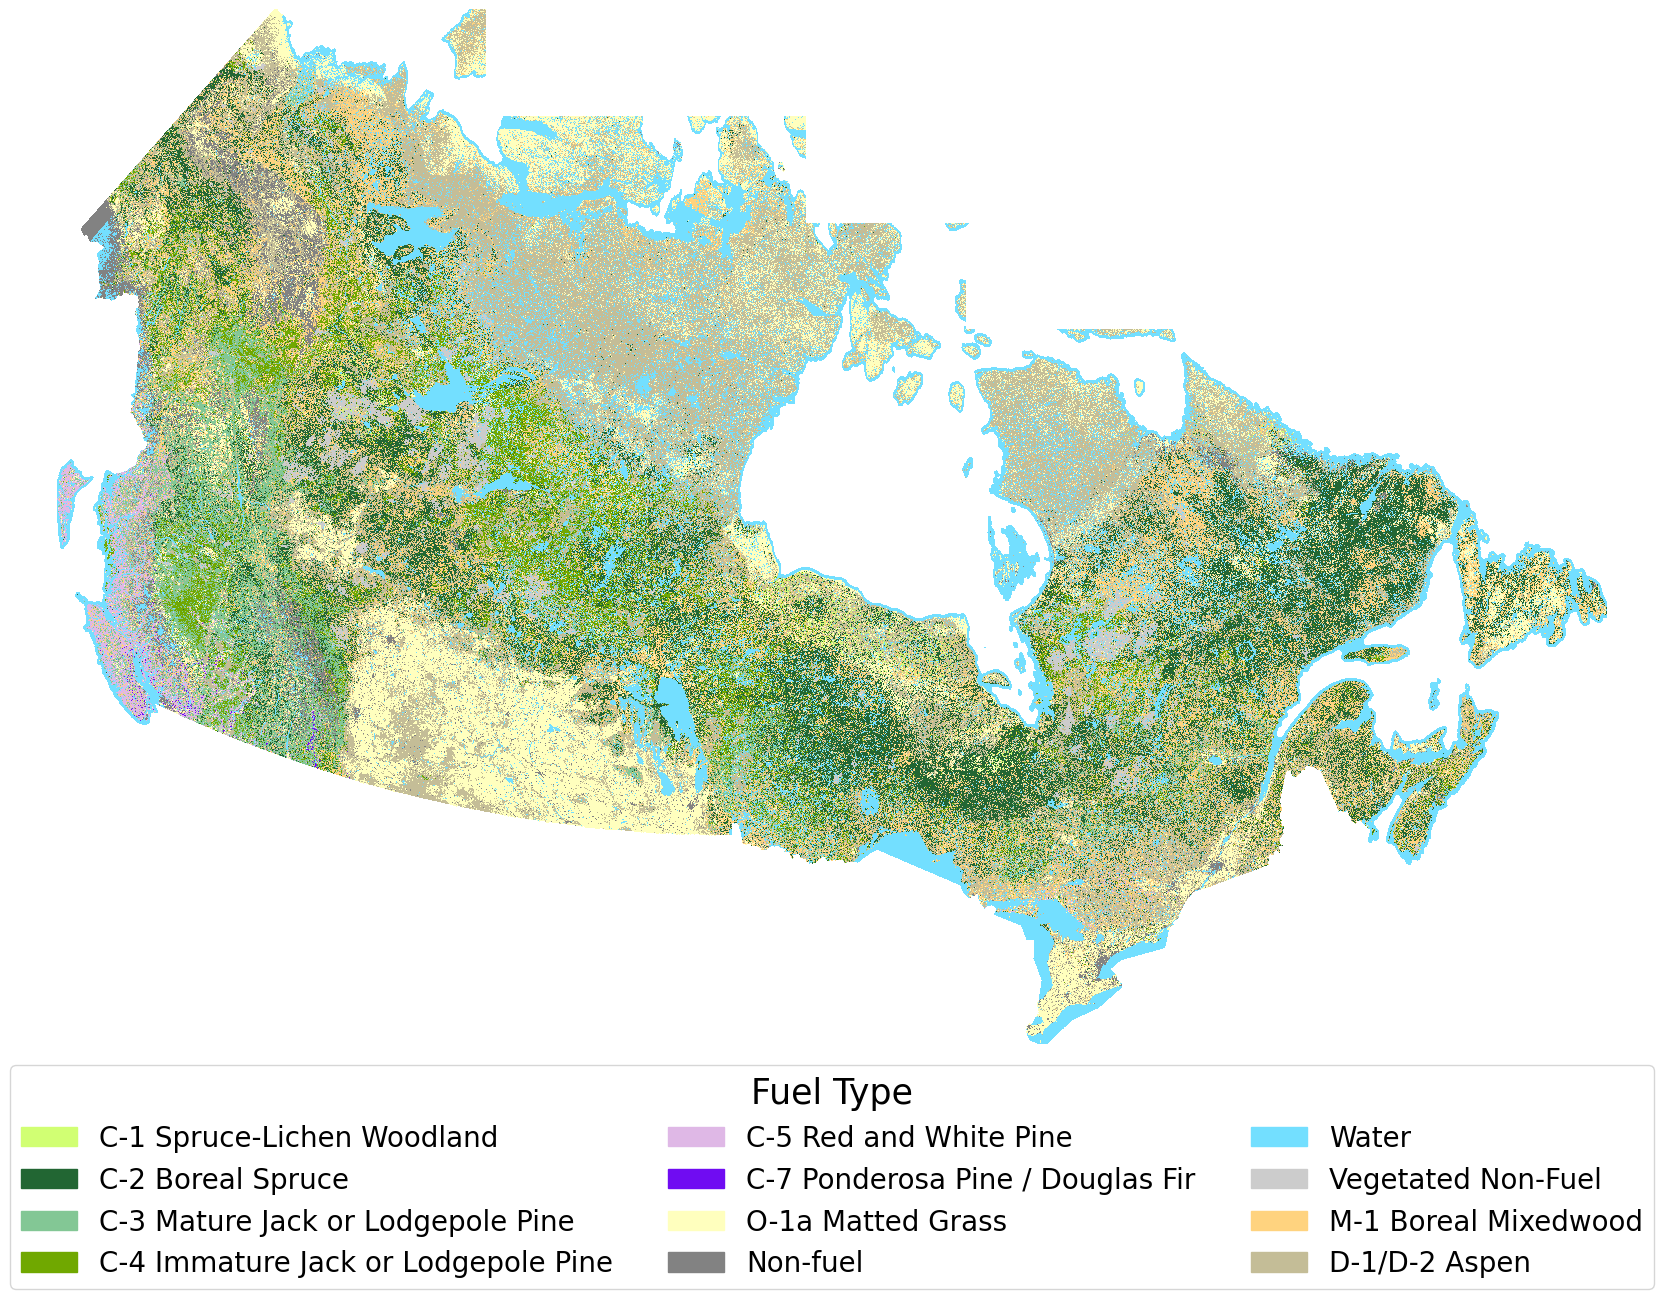

In [30]:
fig, ax = plt.subplots(
    figsize = (20,20)
)

plt.imshow(
    image_data[::SAMPLE_SIZE, ::SAMPLE_SIZE], 
    cmap=cmap, 
    norm=norm, 
    interpolation="nearest"
)

plt.axis('off')

plot_legend()